Objective 1

In [31]:
import soundfile as sf
from IPython.display import Audio


data, fs = sf.read('objective01_n.wav')

info = sf.info('objective01_n.wav')

print(f"Sampling Rate: {fs} Hz")
print(f"Bit Depth: {info.subtype}")
print(f"Duration: {len(data) / fs:.2f} seconds")

Audio(data, rate=fs)

Sampling Rate: 44100 Hz
Bit Depth: PCM_16
Duration: 5.90 seconds


Objective 2

1. Import and read a speech file.

In [32]:
!pip install soundfile librosa scipy

import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy import signal
from IPython.display import Audio, display

# Path to your LJ Speech file
file_path = 'LJ025-0076.wav'

2. Plot the waveform of speech signal (time-domain signal). Display basic information
about the speech file: sample rate, no. of samples, and total duration and active
speech duration (i.e. only where energy is above silence threshold).

Sample Rate: 22050 Hz
Number of Samples: 185146
Total Duration: 8.40 seconds
Active Speech Duration: 5.34 seconds


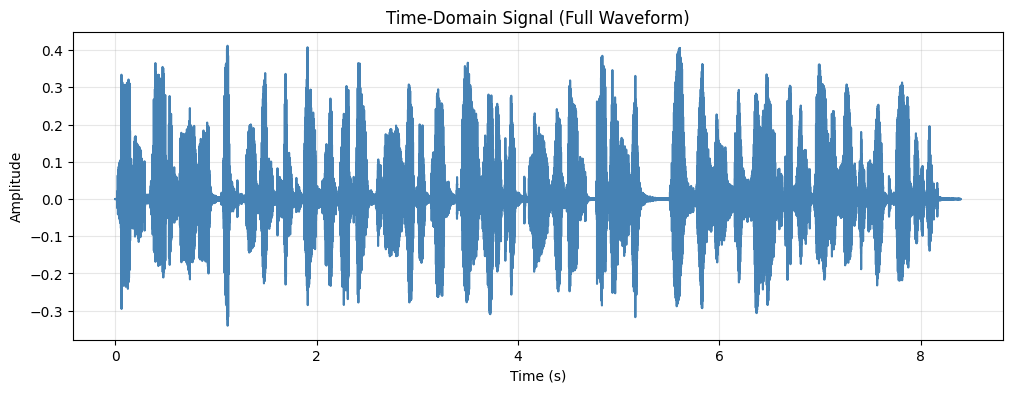

In [33]:
# Load the audio file
data, fs = sf.read(file_path)

# 1. Basic Information
n_samples = len(data)
total_duration = n_samples / fs

# 2. Active Speech Duration
# We define active speech as parts where the signal amplitude is > 0.01 (threshold)
threshold = 0.01
active_mask = np.abs(data) > threshold
active_samples = np.sum(active_mask)
active_duration = active_samples / fs

print(f"Sample Rate: {fs} Hz")
print(f"Number of Samples: {n_samples}")
print(f"Total Duration: {total_duration:.2f} seconds")
print(f"Active Speech Duration: {active_duration:.2f} seconds")
display(Audio(data, rate=fs))
# 3. Plot Waveform
time = np.linspace(0, total_duration, n_samples)
plt.figure(figsize=(12, 4))
plt.plot(time, data, color='steelblue')
plt.title('Time-Domain Signal (Full Waveform)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.show()

3. Perform basic signal operations:

i. Slicing (extract first 2 sec.) and normalization. Plot each sliced signal and the
normalized signal.

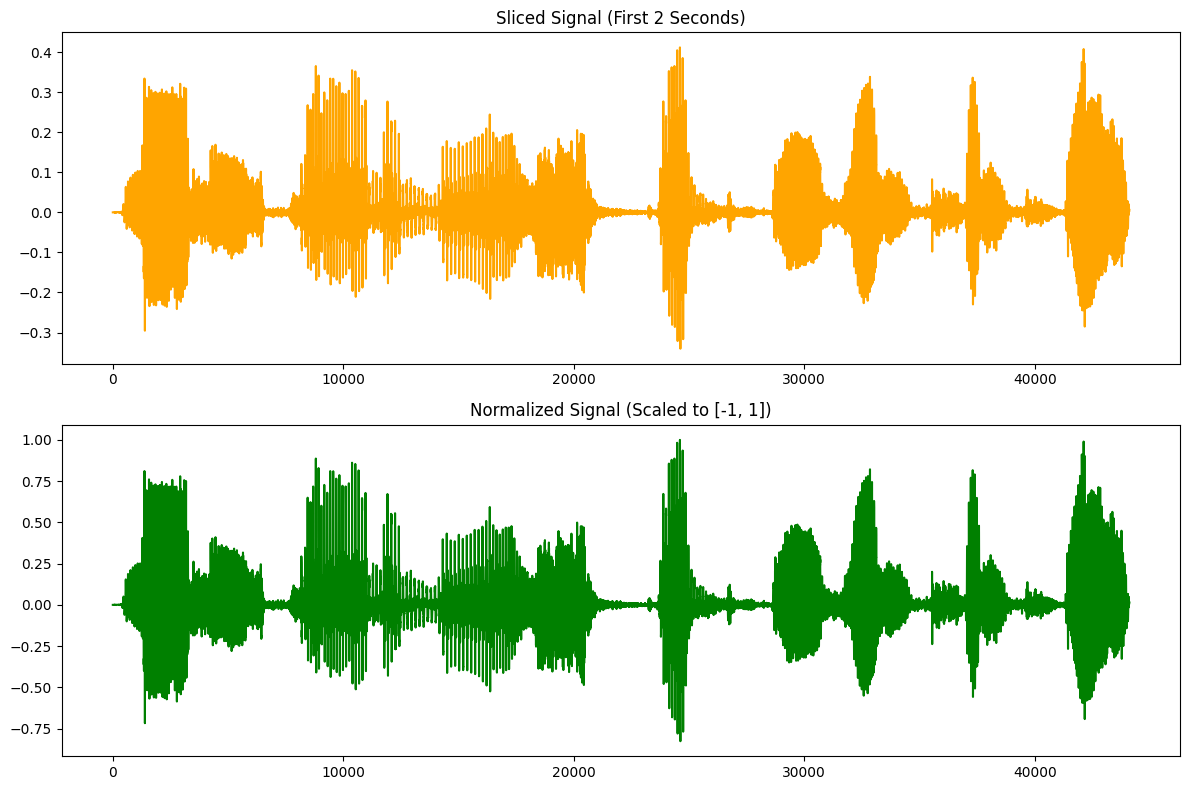

In [34]:
# Slice first 2 seconds
slice_end = 2 * fs
data_sliced = data[:slice_end]

# Normalization
data_normalized = data_sliced / np.max(np.abs(data_sliced))

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

ax1.plot(data_sliced, color='orange')
ax1.set_title("Sliced Signal (First 2 Seconds)")

ax2.plot(data_normalized, color='green')
ax2.set_title("Normalized Signal (Scaled to [-1, 1])")

plt.tight_layout()
plt.show()

ii. Slicing (extract first 2 sec.) and normalization. Plot each sliced signal and the
normalized signal.


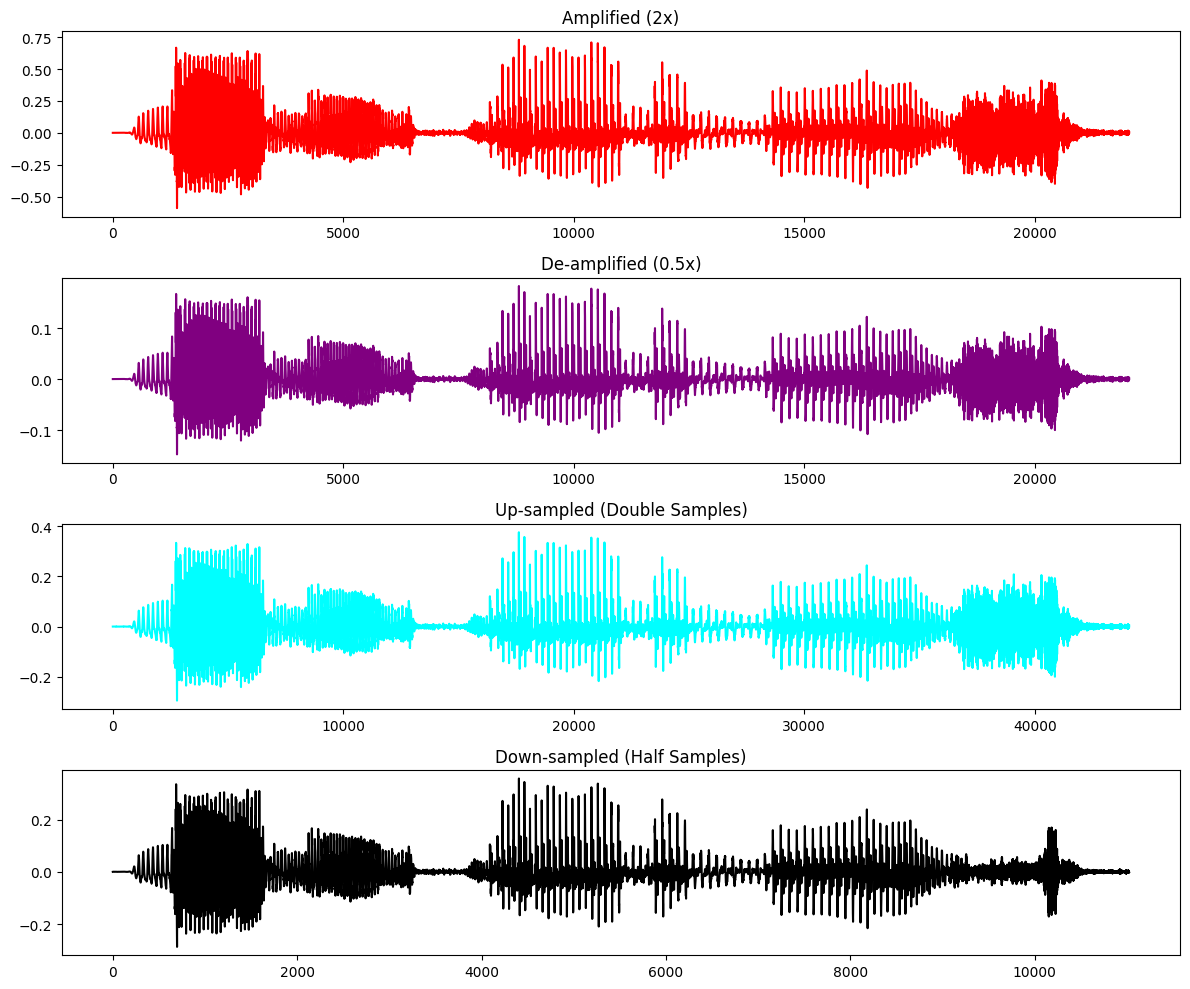

In [35]:
# 1. Gain Changes
data_amp = data * 2.0
data_deamp = data * 0.5

# 2. Resampling
# Down-sampling (factor of 2)
num_samples_down = n_samples // 2
data_down = signal.resample(data, num_samples_down)

# Up-sampling (factor of 2)
num_samples_up = n_samples * 2
data_up = signal.resample(data, num_samples_up)

# Visual comparison
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(data_amp[:fs], color='red') # Plotting 1s for clarity
plt.title("Amplified (2x)")

plt.subplot(4, 1, 2)
plt.plot(data_deamp[:fs], color='purple')
plt.title("De-amplified (0.5x)")

plt.subplot(4, 1, 3)
plt.plot(data_up[:fs*2], color='cyan')
plt.title("Up-sampled (Double Samples)")

plt.subplot(4, 1, 4)
plt.plot(data_down[:fs//2], color='black')
plt.title("Down-sampled (Half Samples)")

plt.tight_layout()
plt.show()

iii. Plot the waveform for each.
Identify voiced/unvoiced/silence portions visually.  

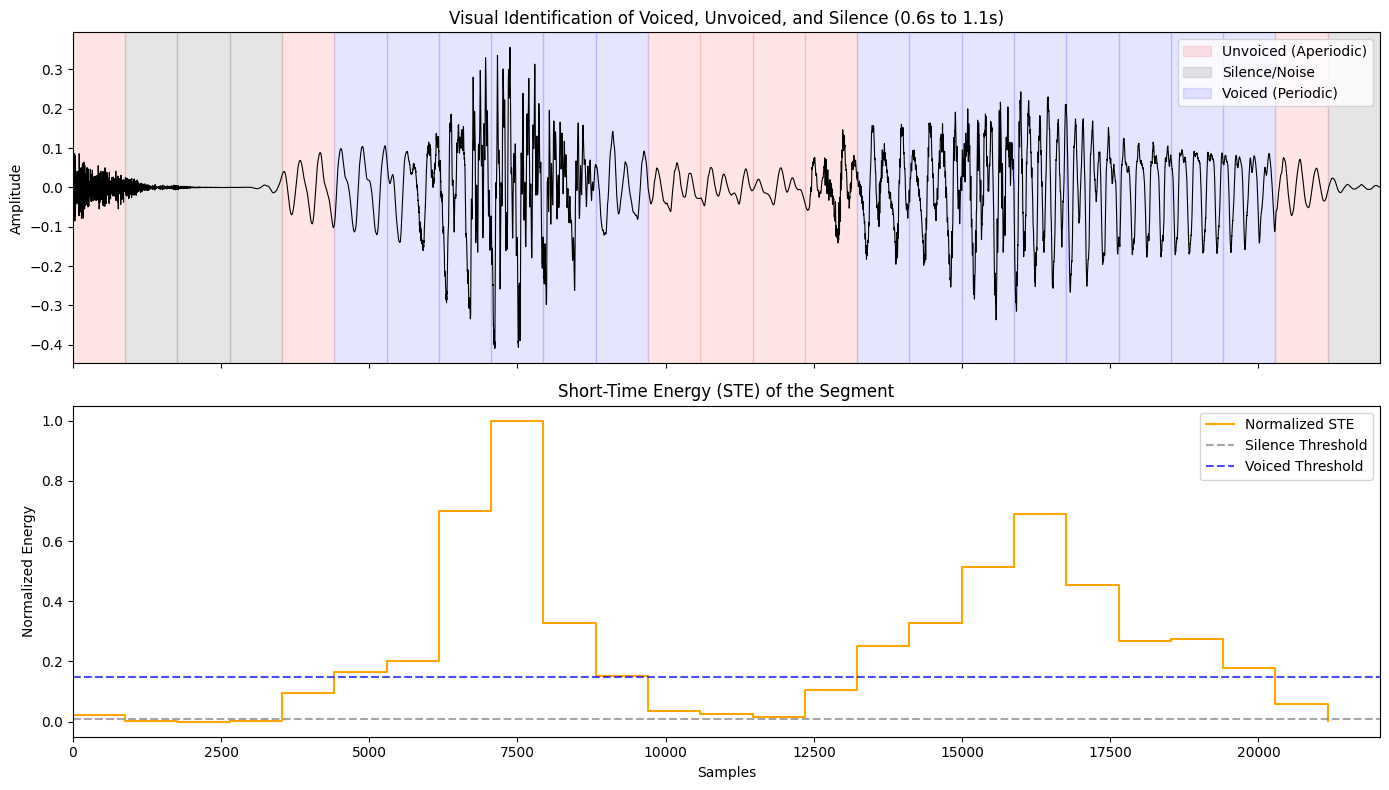

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Zoom into the 0.5s segment
start_idx = int(0.6 * fs)
end_idx = int(1.1 * fs)
segment = data[start_idx:end_idx]

# 2. Define frame properties (20ms frames)
frame_length_ms = 20
frame_size = int(fs * (frame_length_ms / 1000))

# 3. Calculate Short-Time Energy (STE) for each frame
energies = []
for i in range(0, len(segment), frame_size):
    frame = segment[i:i + frame_size]
    energies.append(np.sum(frame**2))

energies = np.array(energies)
if np.max(energies) > 0:
    energies = energies / np.max(energies) # Normalized STE

# Thresholds
silence_thresh = 0.01
voiced_thresh = 0.15

# 4. Create Subplots (Top: Waveform, Bottom: Short-Time Energy)
# Using sharex=True keeps the waveform and STE aligned if you zoom or pan
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# --- Top Plot: Waveform with colored regions ---
ax1.plot(segment, color='black', linewidth=0.8)

for i, energy in enumerate(energies):
    f_start = i * frame_size
    f_end = min((i + 1) * frame_size, len(segment))

    if energy < silence_thresh:
        ax1.axvspan(f_start, f_end, color='gray', alpha=0.2, label='Silence/Noise')
    elif energy >= voiced_thresh:
        ax1.axvspan(f_start, f_end, color='blue', alpha=0.1, label='Voiced (Periodic)')
    else:
        ax1.axvspan(f_start, f_end, color='red', alpha=0.1, label='Unvoiced (Aperiodic)')

# Clean up duplicate labels in legend
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), loc='upper right')
ax1.set_title("Visual Identification of Voiced, Unvoiced, and Silence (0.6s to 1.1s)")
ax1.set_ylabel("Amplitude")
ax1.set_xlim(0, len(segment))

# --- Bottom Plot: Short-Time Energy (STE) ---
# Create an array representing the start sample of each frame to plot the step graph
frame_starts = np.arange(len(energies)) * frame_size

# Use a step plot to clearly show the energy held constant across each frame
ax2.step(frame_starts, energies, where='post', color='orange', linewidth=1.5, label='Normalized STE')

# Add reference lines for the thresholds
ax2.axhline(silence_thresh, color='gray', linestyle='--', alpha=0.7, label='Silence Threshold')
ax2.axhline(voiced_thresh, color='blue', linestyle='--', alpha=0.7, label='Voiced Threshold')

ax2.set_title("Short-Time Energy (STE) of the Segment")
ax2.set_xlabel("Samples")
ax2.set_ylabel("Normalized Energy")
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()